Kaone Glorious Sekao

glorioussekao00@outlook.com

WTF/2025/8646

INDIVIDUAL ASSIGNMENT - DUE ON FRIDAY 10:00AM
Class Task (using the employe data)  

1)Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2)Plot bar charts showing impact of employee salaries on retention

3)Plot bar charts showing corelation between department and employee retention

4)Now build logistic regression model using variables that were narrowed down in step 1

5)Measure the accuracy of the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HR_comma_sep 1.csv")

In [8]:
# 1. Exploratory Data Analysis (EDA)
#Check correlations with left:
data_numeric = data.select_dtypes(include=['number'])
data_numeric.corr()['left'].sort_values()

,left
satisfaction_level,-0.388375
Work_accident,-0.154622
promotion_last_5years,-0.061788
last_evaluation,0.006567
number_project,0.023787
average_montly_hours,0.071287
time_spend_company,0.144822
left,1.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# data preparation
X = data_numeric.drop('left', axis=1)
y = data_numeric['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix (shows stay/leave counts)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report (precision, recall for stay/leave)
print(classification_report(y_test, y_pred))

[[3421    7]
 [  43 1029]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.98      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



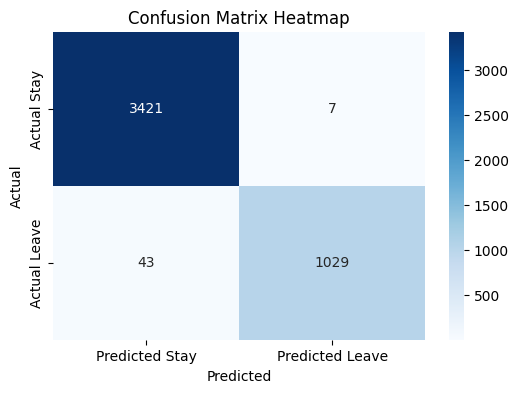

In [15]:
#Plotted a heat map  to see where the model slips on 'leave' cases

# Confusion matrix data from
cm = [[3421, 7],
      [43, 1029]]

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Stay', 'Predicted Leave'],
            yticklabels=['Actual Stay', 'Actual Leave'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

<Axes: xlabel='salary', ylabel='count'>

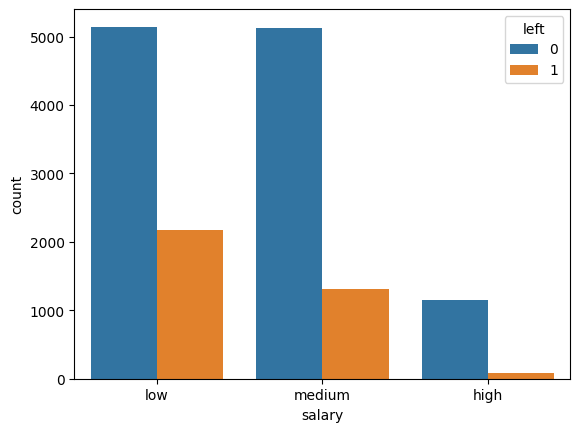

In [10]:
#2.  Impact of employee salaries on retention
sns.countplot(x='salary', hue='left', data=data)

<Axes: xlabel='Department', ylabel='count'>

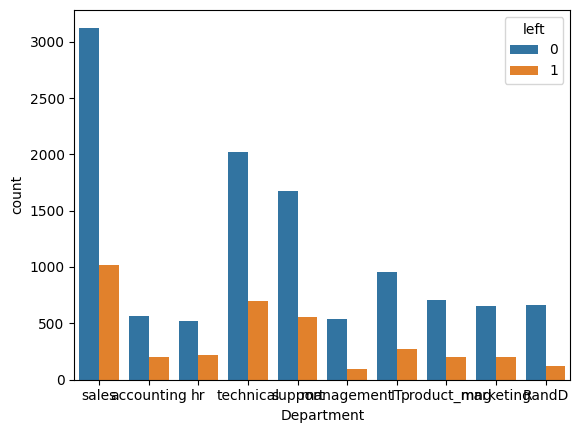

In [11]:
#3. Corelation between department and employee retention
sns.countplot(x='Department', hue='left', data=data)

In [12]:
#4. Logistic Regression Model:
data_dummies = pd.get_dummies(data, columns=['Department', 'salary'], drop_first=True)
X = data_dummies[['satisfaction_level', 'average_montly_hours',
                  'Department_RandD', 'Department_accounting',
                  'salary_low', 'salary_medium']]
y = data_dummies['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
#5. Accuracy:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7808888888888889
